# Peak-Valley Method

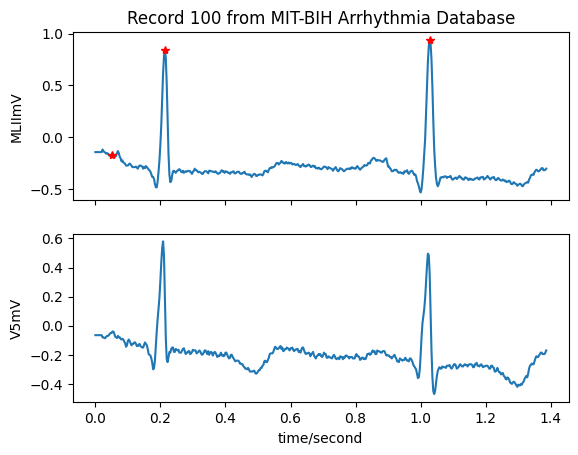

{'record_name': '100',
 'extension': 'atr',
 'sample': array([ 18,  77, 370], dtype=int64),
 'symbol': ['+', 'N', 'N'],
 'subtype': array([0, 0, 0]),
 'chan': array([0, 0, 0]),
 'num': array([0, 0, 0]),
 'aux_note': ['(N\x00', '', ''],
 'fs': 360,
 'label_store': None,
 'description': None,
 'custom_labels': None,
 'contained_labels': None,
 'ann_len': 3}

In [1]:
import copy
import wfdb
import numpy as np
import pandas as pd
from tsfresh import extract_features, select_features, extract_relevant_features
from tsfresh.utilities.dataframe_functions import impute

SAMPLE_NUM = 500

record = wfdb.rdrecord('src/mitdb/100', sampto = SAMPLE_NUM)
annotation = wfdb.rdann('src/mitdb/100', 'atr', sampto = SAMPLE_NUM)

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Record 100 from MIT-BIH Arrhythmia Database',
               time_units='seconds')
display(annotation.__dict__)


In [6]:
# Define arrays for dataframe
v_data = record.p_signal
v_id = np.ones(shape=(v_data[:,0].size,1), dtype=int)
v_time = np.arange(0, v_data[:,0].size, 1, dtype=int)
v_ann = np.zeros(shape=(v_data[:,0].size,1), dtype=str)

# Extract annotation symbols
for i in range(len(annotation.sample)):
    v_ann[(annotation.sample)[i]] = annotation.symbol[i]

#print(v_ann)

timeseries = pd.DataFrame({'id': v_id[:,0], 'time': v_time, 'data': v_data[:,0], 'ann': v_ann[:,0]})
print(timeseries.to_string())
#timeseries.size

     id  time   data ann
0     1     0 -0.145    
1     1     1 -0.145    
2     1     2 -0.145    
3     1     3 -0.145    
4     1     4 -0.145    
5     1     5 -0.145    
6     1     6 -0.145    
7     1     7 -0.145    
8     1     8 -0.120    
9     1     9 -0.135    
10    1    10 -0.145    
11    1    11 -0.150    
12    1    12 -0.160    
13    1    13 -0.155    
14    1    14 -0.160    
15    1    15 -0.175    
16    1    16 -0.180    
17    1    17 -0.185    
18    1    18 -0.170   +
19    1    19 -0.155    
20    1    20 -0.175    
21    1    21 -0.180    
22    1    22 -0.190    
23    1    23 -0.180    
24    1    24 -0.155    
25    1    25 -0.135    
26    1    26 -0.155    
27    1    27 -0.190    
28    1    28 -0.205    
29    1    29 -0.235    
30    1    30 -0.225    
31    1    31 -0.245    
32    1    32 -0.250    
33    1    33 -0.260    
34    1    34 -0.275    
35    1    35 -0.275    
36    1    36 -0.275    
37    1    37 -0.265    
38    1    38 -0.255    


In [3]:
# Sample array
array = annotation.sample

# Assigning initial value to id column
timeseries['id'] = 0

# Iterate through the time values
for i in range(len(array)):
    if i == 0:
        timeseries.loc[timeseries['time'] <= array[i], 'id'] = i + 1
    else:
        timeseries.loc[(timeseries['time'] > array[i - 1]) & (timeseries['time'] <= array[i]), 'id'] = i + 1

timeseries.loc[timeseries['time'] > array[-1], 'id'] = len(array) + 1

#print(array)
#print(timeseries.to_string())

In [4]:
# Calculate derivative
v_deriv = np.zeros(shape=(v_data[:,0].size,1))
v_deriv = np.gradient(timeseries['data'].to_numpy())
timeseries.insert(len(timeseries.columns), 'derivative', v_deriv, True)
#print(timeseries.to_string())


<Axes: xlabel='time'>

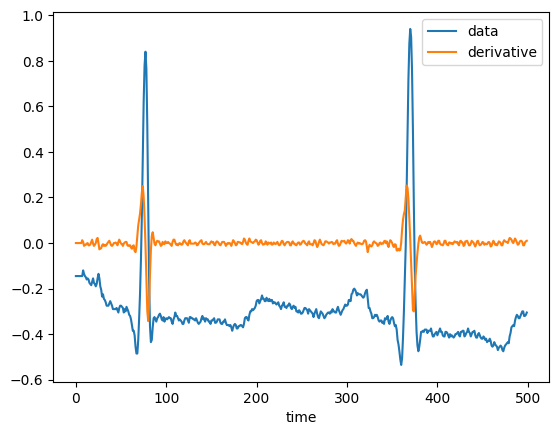

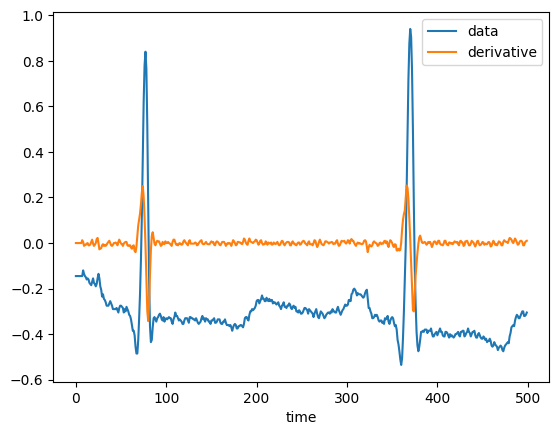

In [5]:
timeseries.plot(x='time', y=['data','derivative'])
timeseries.plot(x='time', y=['data','derivative'])